# Numerical Solutions to the Diffusion Equation in 1-D  

## Mathematical Problem
The diffusion equation in one dimension ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t}  =  \kappa \frac{\partial^2 u}{\partial x^2} . 
  \ref{eq:Diff}
\end{align}

The parabolic equation is simple, but a useful test case for numerical insights into the solutions of parabolic equations. To solve this equation, numerically or analytically, we need an initial condition at $t_0$, 
\begin{align}
u(x,t_0) = \eta(x)
\end{align}
and boundary conditions 
\begin{align}
\begin{aligned}
u(0,t) &= u(L,t) \;\; \text{for} \;\; t>0\\
u(L,t) &= u(0,t) \:\;\; \text{for} \;\; t>0\\
\end{aligned}
\end{align}
in this case periodic boundary conditions on the domain $0 \leq x \leq L$. 


## Numerical Approach 

We will aplly finite differences on a discrete grid with grid points $(x_i, t_j)$ where
\begin{align}
  x_i = i h && t_j = j k. 
\end{align}
Here $h = \Delta x$ is the grid cell spacing and $k = \Delta t$ is the time step, with $U^i_j \approx u(x_i, t_j)$ is numerical approximation at $(x_i, t_j)$.

A classical forward in time one-step approach for solving the diffusion equation is the _Crank-Nicolson_ method  

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \kappa \frac{1}{2} \left( D_{xx} U_i^{j+1} + D_{xx} U_i^{j}\right)
\end{align}  

where $D_{xx}$ is the discrete differential operator for the second derivative. Expanding the second derivative with centered differences   

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \frac{\kappa}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}   

that can be rearranged as 

\begin{align}  
  U_i^{j+1} &= U_i^{j} + \frac{\kappa \Delta t}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}  

or   

\begin{align}  
  -r U_{i-1}^{j+1} + (1+2r)\;U_i^{j+1} -r U_{i+1}^{j+1}&= r U_{i-1}^{j} + (1-2r)\;U_i^{j} + r U_{i+1}^{j}
  \label{eq:unp1l}
\end{align}
  
where $ r = \left. \kappa \Delta t \middle/ 2 \Delta x^2 \right.$. This is an _implicit_ method since the solution for $U_n^{j+1}$ depends on both $U_n^{j}$ and itself ($U_n^{j+1}$). The method gives a tridiagonal system of equations to solve for all $U_n^{j+1}$ values simultaneously. Equation \ref{eq:unp1l} above holds for the interior points $i = 1, \ldots, i-1$, but not on the boundaries $i = 0,L$. We must look at the the discrete equation in more detail at those points. At $i=0$   

\begin{align}  
 -r U_{-1}^{j+1} + (1+2r)\;U_0^{j+1} -r U_{1}^{j+1} &= r U_{-1}^{j} + (1-2r)\;U_0^{j} + r U_{1}^{j},
\end{align}

given our periodic boundary conditions $U_{-1} \equiv U_{m}$, and therefore 

\begin{align}  
 (1+2r)\;U_0^{j+1} -r U_{1}^{j+1} -r U_{m}^{j+1} +  &=  (1-2r)\;U_0^{j} + r U_{1}^{j} + r U_{m}^{j}.
\end{align}

Again, using the periodic boundary conditions we are left with

\begin{align}
 -r U_{0}^{j+1} -r U_{L-1}^{j+1} + (1+2r)\;U_L^{j+1} &= r U_{0}^{j} + r U_{L-1}^{j} + (1-2r)\;U_L^{j} + r U_{0}^{j}
\end{align}  

at $i=L$. Using both boundary conditions the system of equations in matrix form is 

$$
\begin{bmatrix}
    (1+2 r)  & -r &  &  &  &  -r\\
    -r & (1+2 r) & -r &  &  &  \\
     & -r & (1+2 r) & -r &  &   \\
     &  & \ddots & \ddots & \ddots &  \\
     &  & & -r & (1+2 r) & -r \\
     -r &  & &    & -r & (1+2 r) 
    \end{bmatrix}
    \begin{bmatrix}
    U_1^{n+1} \\
    U_2^{n+1} \\
    U_3^{n+1} \\
    \vdots \\
    U_{m-1}^{n+1} \\
    U_{m}^{n+1}
    \end{bmatrix} =
    \begin{bmatrix}
    (1-2r)\;U_1^{j} + r U_{2}^{j} + r U_{-1}^{j}\\
    r U_{1}^{j} + (1-2r)\;U_2^{j} + r U_{3}^{j} \\
    r U_{2}^{j} + (1-2r)\;U_{3}^{j} + r U_{4}^{j} \\
    \vdots \\
    r U_{m-2}^{j} + (1-2r)\;U_{m-1}^{j} + r U_{m}^{j} \\
    rU_{0}^{j} + r U_{m-1}^{j} + (1-2r)\;U_{m}^{j}  
    \end{bmatrix} .
$$

How to best solve this linear system of equations is a question worth diving deeper into. The linear system above is (nearly) tridiagonal, meaning it only has entries on the main-, sub-, and super- diagonal positions. A general linear system is typically of form $Ax = b$, where $A \in {\rm I\!R}^{M\times N}$, $b$ is known vector, and $x$ is the unknown vector in question (here $U_i^{j+1}$ for all $i$). The trivial way to solve this linear system is through matrix inversion 
$$
x = A^{-1}b
$$
which in an of it self is an ill-conditioned operation, but none the less takes $\cal{O}(n^3)$. Another naive solution might be Gaussian Elimination that also takes $\cal{O}(n^3)$. 

Since we are using an _implicit_ scheme, ones first thought might be to use an iterative solver, but we can exploit the fact that this matrix is (nearly) tridiagonal and use a slight variation of extremely efficient __Thomas algorithm__ with a complexity of $\cal{O}(n)$. 

#### Stability 

The _Crank-Nicolson_ is stable for all $\Delta x$ and $\Delta t$, but a common condition for ensuring accuracy of the solution is

## Python Implementation 

Here we implement the Crank-Nicolson method for the 1-D diffusion equation as both a native python solution and object oriented method. The object oriented method defines a `Diffusion` class that allows for easily reproducible results and implementation in later experiments with the advection-diffusion equation.   



In [1]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt

# Local
sys.path.append('../')
from advdiff.plot import animation

First, we select an initial condition ($u(x,0) = \eta$), such that it satisfies Eqn. \ref{eq:Diff}. The diffusion equation admits 
\begin{align}
  u(x,t) = \frac{1}{\sqrt{4 \kappa \pi t}} \exp \left(- \frac{(x-\mu)^2}{4 \kappa t} \right)
  \ref{eq:GaussPulse}
\end{align}
as a solution. At $t=0$ Eqn. \ref{eq:GaussPulse} is the Dirac delta function. Therefore we start the solution at $t_0=t_\epsilon$ such that $t = t + t_\epsilon$. We choose the pulse to be centered at $x=0.5$ on the domain $0\leq x \leq 1$.

In [2]:
# Inital Condition
def η(x, t, κ=3e-3, μ = 0.5):
    return (4*κ*np.pi*t)**-0.5*np.exp(-(x-μ)**2/(4*κ*t))

Next, we define numerical parameters and define variables pertinent to diffusion equation (_i.e._ $\kappa$).

In [3]:
   #################   Init. Constant   ###################
κ  = 3e-2                  # Diffusivity 
L  = 1.                    # Domain Length 
nx = 200                   # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                   # Num time steps
σ  = 1                     # courant number
dt = (σ*dx)**2/κ           # time step 

Then using our define numerical parameters we generate the model domain, impose our initial condition and generate the left and right matrices ($A$ and $B$). We enforce our periodic boundary condition by appending values to $-r$ or $r$ to the top-right and bottom-left corners of $A$ and $B$, respectively. 

In [4]:
##################   Init. Domain   ####################
r  = (κ*dt)/(2*dx**2)      # matrix const.
x  = np.linspace(dx,L,nx)  # spatial grid
U  = np.zeros((nt,nx))     # solution array
U[0,:] = η(x,0.01,κ)       # init. condition
u  = U.copy()              # Analytical Sol. Arr

# Right Matrix (A)
A = np.diagflat([[(1+2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (-r)  for __ in range(nx-1)]],1) +\
    np.diagflat([[  (-r)  for __ in range(nx-1)]],-1)
A[0,-1] = -r               # Periodic Boundary Cond. (PBC)
A[-1,0] = -r               # PBC

# Left Matrix (B)
B = np.diagflat([[(1-2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (r)   for __ in range(nx-1)]],1) +\
    np.diagflat([[  (r)   for __ in range(nx-1)]],-1)
B[0,-1] = r                # PBC
B[-1,0] = r                # PBC

Finally, we loop through time and solve the linear system with `Scipy`'s default linear solver. 

In [5]:
#################    Time stepping   ###################
for t in range(0,nt-1):
    # Numerical 
    b     = B.dot(U[t,:])           # left vect.
    U[t+1,:]  = LA.solve(A,b).flatten() # itterative solv.
    
    # Analytcial 
    u[t+1,:] = η(x,(t*dt)+0.01,κ)
       

Below we plot an animation of the solution through time.

In [6]:
simul = animation(1,1,x,(U,u),nt,L)
simul.labels('x',r'$U$')
simul.animate()

### Convergence Tests

We now use our `Diffusion` class to test the dependence of the error (as measured by the $\infty$ norm) on the grid cell spacing $\Delta x$. We test 10 values of $\Delta x$ ranging from 0.1 to 0.001. 

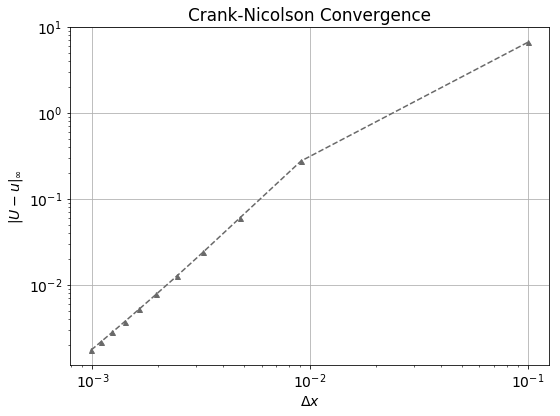

In [7]:
from advdiff.model import Diffusion

def analytic(x, t, κ=3e-3, μ = 0.5):
    return (4*κ*np.pi*t)**-0.5*np.exp(-(x-μ)**2/(4*κ*t))

params     = {'L':1,'nx':100,'nt':50}
diff_param = {'κ':3e-2, 'σ':0.1}

nxs = np.arange(10,1100,100)
err = np.zeros(nxs.shape[0])

for i, nx in enumerate(nxs):
    params['nx'] = nx
    
    model = Diffusion(params,diff_param)
    model.U[0,:] = analytic(model.x,0.01,diff_param['κ'])             
    CN = model.crank_nicolson('w')

    exact = np.zeros_like(CN)
    for t in range(model.nt):
        exact[t,:] = analytic(model.x,t*model.dt+0.01,diff_param['κ'])
        
    err[i] = LA.norm(CN - exact,np.inf)    
    
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.loglog(1/nxs,err,'^--',color='dimgrey',label='Crank-Nicolson', markersize=5)
ax.grid()
ax.set_ylabel(r'$|U-u|_\infty$')
ax.set_xlabel(r'$\Delta x$')
ax.set_title(r'Crank-Nicolson Convergence')
plt.tight_layout()

__Note__: $U$ is the numerical solution while $u$ is the analytical solution. 

The convergence test shows the accuracy of the solution increases with decreasing $\Delta x$, as we might expect. On it's own this information is not terribly insightful, but the convergence rate is a useful method for comparing efficiency between numerical methods. 